In [111]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [113]:
df=pd.read_csv("tvmarketing.csv")
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [115]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [117]:
df.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [121]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [123]:
df.columns

Index(['TV', 'Sales'], dtype='object')

In [125]:
df.isnull().sum()

TV       0
Sales    0
dtype: int64

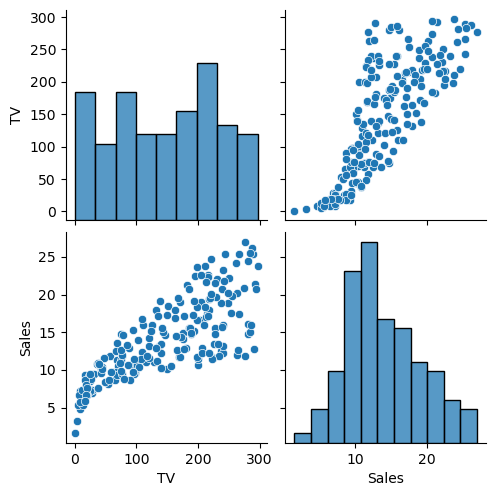

In [127]:
sns.pairplot(df)
plt.show()

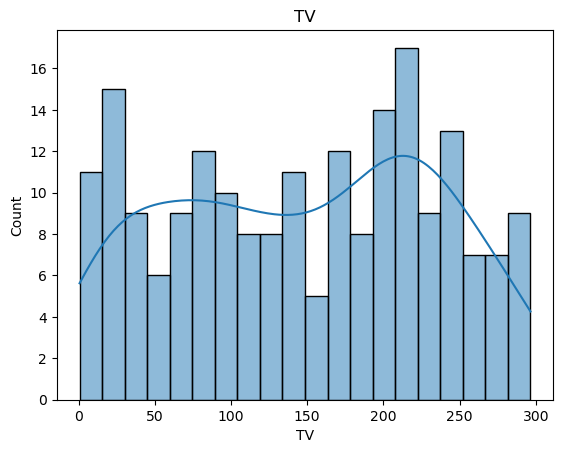

In [128]:
sns.histplot(data=df,x='TV',bins=20,kde=True)
plt.title('TV')
plt.show()

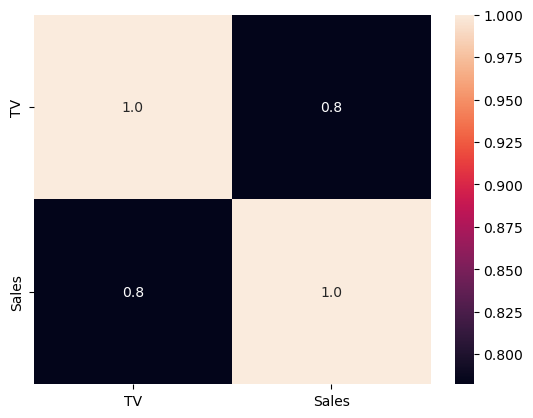

In [129]:
sns.heatmap(df.corr(),annot=True,fmt=".1f")
plt.show()

In [130]:
x=df.drop(columns=["Sales"])
x

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [131]:
y=df["Sales"]


In [133]:
from sklearn.preprocessing import StandardScaler

In [135]:
scaler=StandardScaler()

In [141]:
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.96985227],
       [-1.19737623],
       [-1.51615499],
       [ 0.05204968],
       [ 0.3941822 ],
       [-1.61540845],
       [-1.04557682],
       [-0.31343659],
       [-1.61657614],
       [ 0.61604287],
       [-0.94515567],
       [ 0.79002835],
       [-1.4390876 ],
       [-0.57850171],
       [ 0.66625345],
       [ 0.56466461],
       [-0.92530498],
       [ 1.56887609],
       [-0.90895735],
       [ 0.0030068 ],
       [ 0.8332328 ],
       [ 1.05509347],
       [-1.5628625 ],
       [ 0.94883389],
       [-0.98952781],
       [ 1.35285385],
       [-0.04837147],
       [ 1.08662104],
       [ 1.18820988],
       [-0.89260972],
       [ 1.70316018],
       [-0.3986778 ],
       [-0.58200477],
       [ 1.38438142],
       [-0.59952009],
       [ 1.67747105],
       [ 1.39956136],
       [-0.84473452],
       [-1.21372386],
       [ 0.94533082],
       [ 0.64757044],
       [ 0.34981006],
       [ 1.711334  ],
       [ 0.6989487 ],
       [-1.42390765],
       [ 0

In [143]:

pd.DataFrame(x_scaled,columns=x.columns)

,TV
0,0.969852
1,-1.197376
2,-1.516155
3,0.052050
4,0.394182
...,...
195,-1.270941
196,-0.617035
197,0.349810
198,1.594565


In [145]:
from sklearn.model_selection import train_test_split

In [147]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [149]:
x_train.size

160

In [151]:
y_train.size

160

In [153]:
from sklearn.linear_model import LinearRegression

In [155]:
model=LinearRegression()

In [157]:
model.fit(x_train,y_train)

LinearRegression()

In [159]:
model.score(x_train,y_train)

0.60347412534007

In [161]:
y_pred=model.predict(x_test)

In [163]:
from sklearn.metrics import mean_squared_error,r2_score

In [165]:
mean_squared_error(y_test,y_pred)

7.897543878854643

In [173]:
r2_score(y_test,y_pred)

0.6474070721843945

In [175]:
len(y_pred)

40

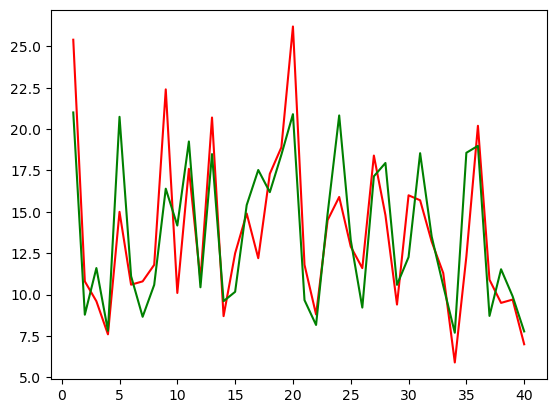

In [177]:
c=[i for i in range(1,41)]
plt.plot(c,y_test,color="red")
plt.plot(c,y_pred,color="green")
plt.show()